# 7th Set of Exercises
# Michele M. Crudele
# 2021858

### Some useful functions

My function to compute confidence/credibility intervals

In [1]:
confidence <- function(post, conf, up) {
    a <- 1-conf
    x <- seq(0, up, 0.0001)
    
    int <- function(x) {
        (integrate(post, 0, x)$value)/(integrate(post, 0, up)$value) #normalization
    }

    s <- lapply(x, int)

    min <- min(x[which(s>a/2)])
    max <- min(x[which(s>1-a/2)-1])

return(list(min, max))
}

Function to compute and display the hypothesis test for the binomial likelihood in the frequentist approach.
It works both for 2 tails and 1 tail test; 
in the latter case, it works only if the rejection tail is the lower one.
I could optimize it for the upper rejection tail too, but it wouldn't be useful for these exercises, so I don't do that.

In [2]:
binom_test_mine <- function(n, p, alpha, yy, n.tails, low, high) {
    options(repr.plot.width=16, repr.plot.height=9)
    aa <- seq(low, high, 1)
    dataset <- dbinom(aa, n, p)
    a <- alpha
    
    if (n.tails==2) {
    cols <- c("springgreen3", "red4")[(dataset < a) + 1]
        } else {
        cols <- c("springgreen3", "red4")[(dataset < a & which(dataset>0) < length(dataset)/2) + 1]
    }
    rej.area <- sum(dataset[cols == "red4"])
    
    if (dbinom(yy, n, p) < a) {
        cols[match(dbinom(yy, n, p), dataset)] = "red"
        } else {
            cols[match(dbinom(yy, n, p), dataset)] = "green"}

    barplot(dataset, col = cols, names.arg = aa)    
    
    abline (h=a, col="red", lty=2, lwd=2)
    text(par("usr")[2]-5, a, labels = paste0("Rejection Area = ", round(rej.area*100, 2), "%"),  
         pos = 1, cex = 1.5, col="red", xpd=TRUE)
    ppp <- dbinom(yy, n, p)
    
    
    cat("The area of the critical region is:", rej.area)
    #cat("\np-value of", paste0(yy, ":"), p_value)

    if (ppp < a) {
    cat("\nI reject the NULL hypothesis at the", paste0(round(rej.area*100, 2), "%"), "level of significance, 
since the observed value is inside the critical region.")
    } else {
        cat("\nI do not reject the NULL hypothesis at the", paste0(round(rej.area*100, 2), "%"), "level of significance, 
since the observed value is outside the critical region.")
    }
}

# Exercise 1

I would assume a Binomial distribution, since the method can detect the desease or not with a certain probability.

The frequentist probability is $\frac{6}{75} = 8\%$

In [3]:
s <- 1000
N <- 1/s
p <- seq(0, 1, length.out = s)
l <- seq(0, 75, length.out=10000)
mu <- 0.15
std <- 0.14
alpha <- (mu^2 - mu^3)/std^2 - mu
beta  <- alpha * (1/mu - 1)
beta.prior <- dbeta(p, alpha, beta)

In [4]:
n <- 75
y <- 6
beta.post <- function (x) {
    return(dbeta(x, alpha+y, beta+n-y)) #conjugate prior
    }

In [5]:
media <- (alpha+y)/(alpha+beta+n)
varianza <- (alpha+y)*(beta+n-y)/((alpha+beta+n)^2*(alpha+beta+n+1))

In [6]:
x.b <- seq(media-varianza^(1/2), media+varianza^(1/2), length.out=length(p))
y.b <- c(beta.post(x.b))
y.b[1]=0
y.b[length(y.b)]=0

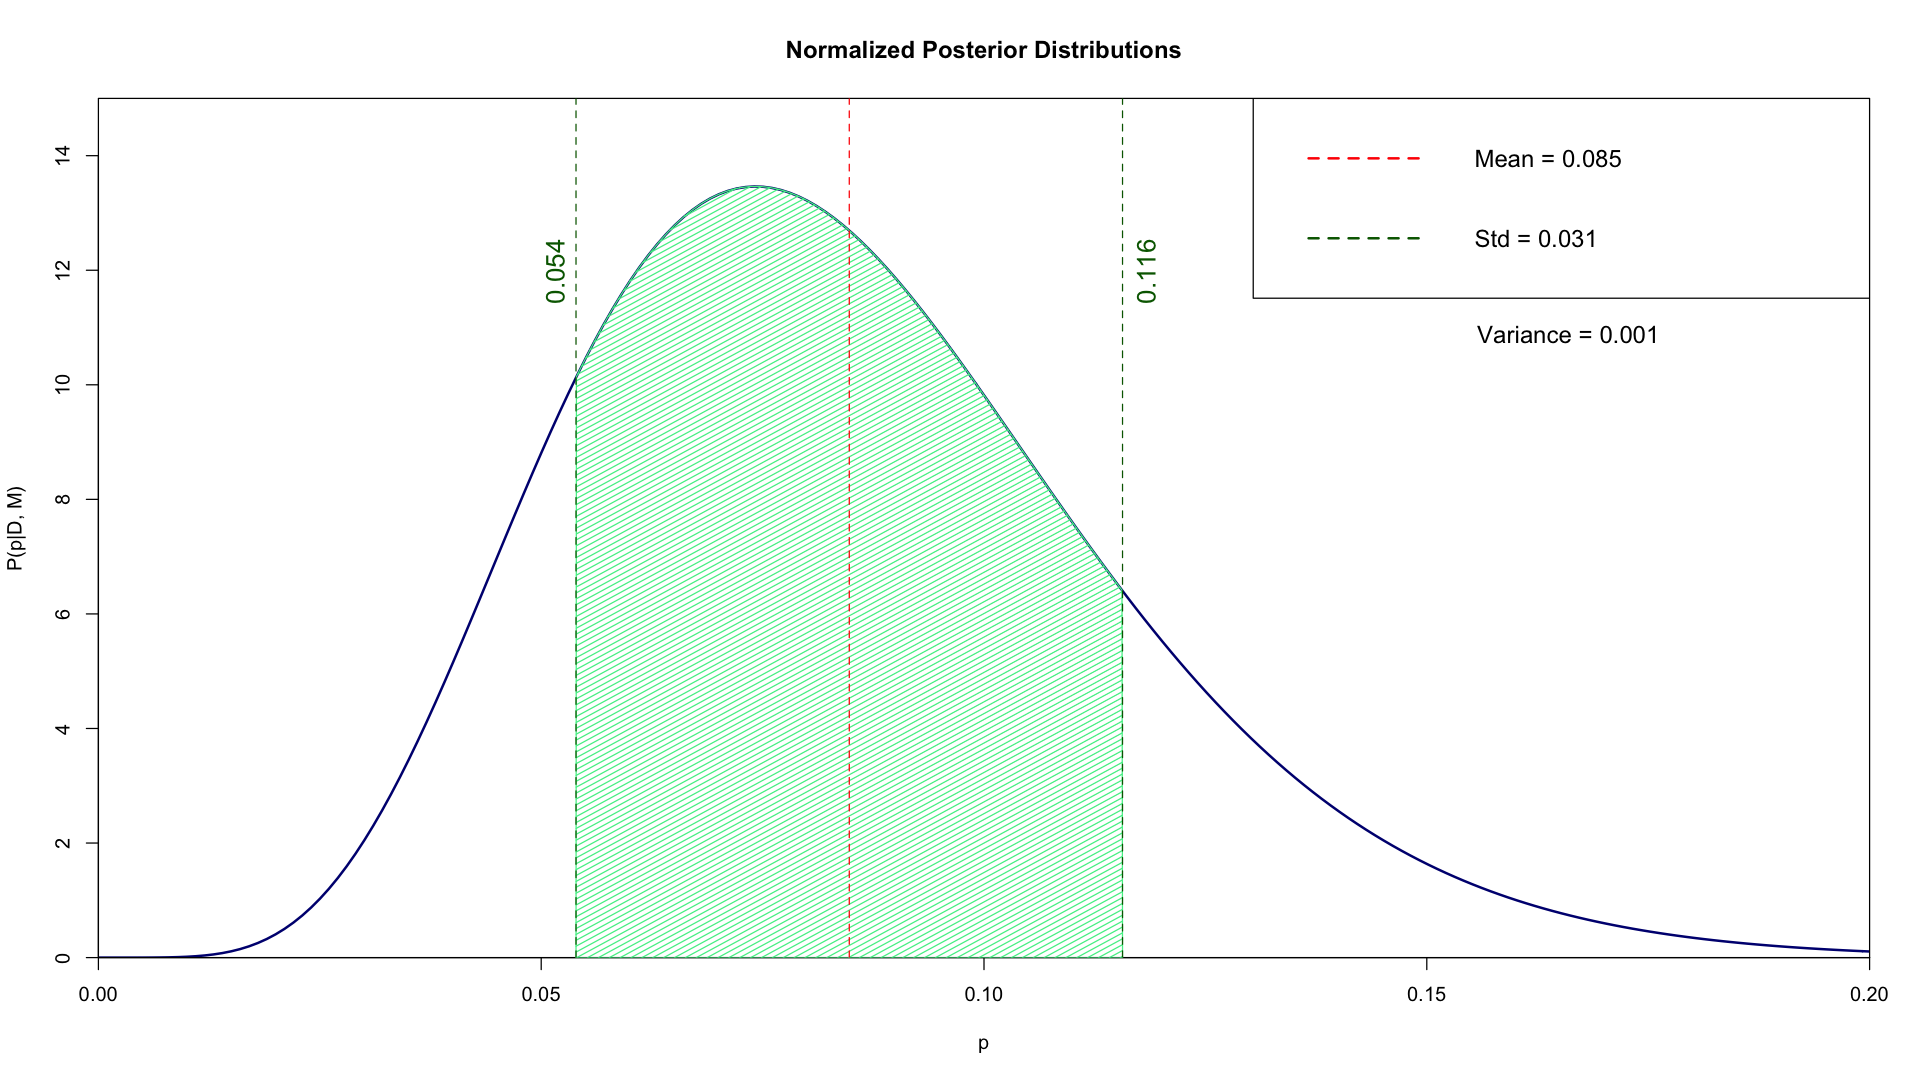

In [7]:
options(repr.plot.width=16, repr.plot.height=9)
plot (p, beta.post(p), type='l', col='navy', lwd=2, xlab='p', ylab='P(p|D, M)', 
      xaxs='i', yaxs='i', ylim = c(0,15),
      main='Normalized Posterior Distributions', xlim=c(0, 0.2))

polygon(x=x.b , y=y.b, col='seagreen2', density = 40)
abline(v=media, col="red", lty=2, pch=1)
abline(v=media+varianza^(1/2), col="darkgreen", lty=2, pch=1)
abline(v=media-varianza^(1/2), col="darkgreen", lty=2, pch=1)
text(media-varianza^(1/2)-0.003, par("usr")[2]+12, labels = round(media-varianza^(1/2), 3), 
     srt=90, pos = 1, cex = 1.3, col="darkgreen", xpd=TRUE)
text(media+varianza^(1/2)+0.002, par("usr")[2]+12, labels = round(media+varianza^(1/2), 3), 
     srt=90, pos = 1, cex = 1.3, col="darkgreen", xpd=TRUE)

legend("topright", legend=c(paste0("Mean = ", round(media, 3)), paste0("Std = ", round(varianza^(1/2), 3))), 
       box.lty=1, cex = 1.2, col=c('red', "darkgreen"),  lty=c(2, 2), lwd=2, y.intersp=2)
text(par("usr")[2]-0.034, 11.2, labels = paste0("Variance = ", round(varianza, 3)),  pos = 1, cex = 1.2, col="black", xpd=TRUE)

## Bayesian approach

The area is less than the 0.05 so I reject the null hypothesis at the 5% level of significance:
the UniPD method is better than the established one.

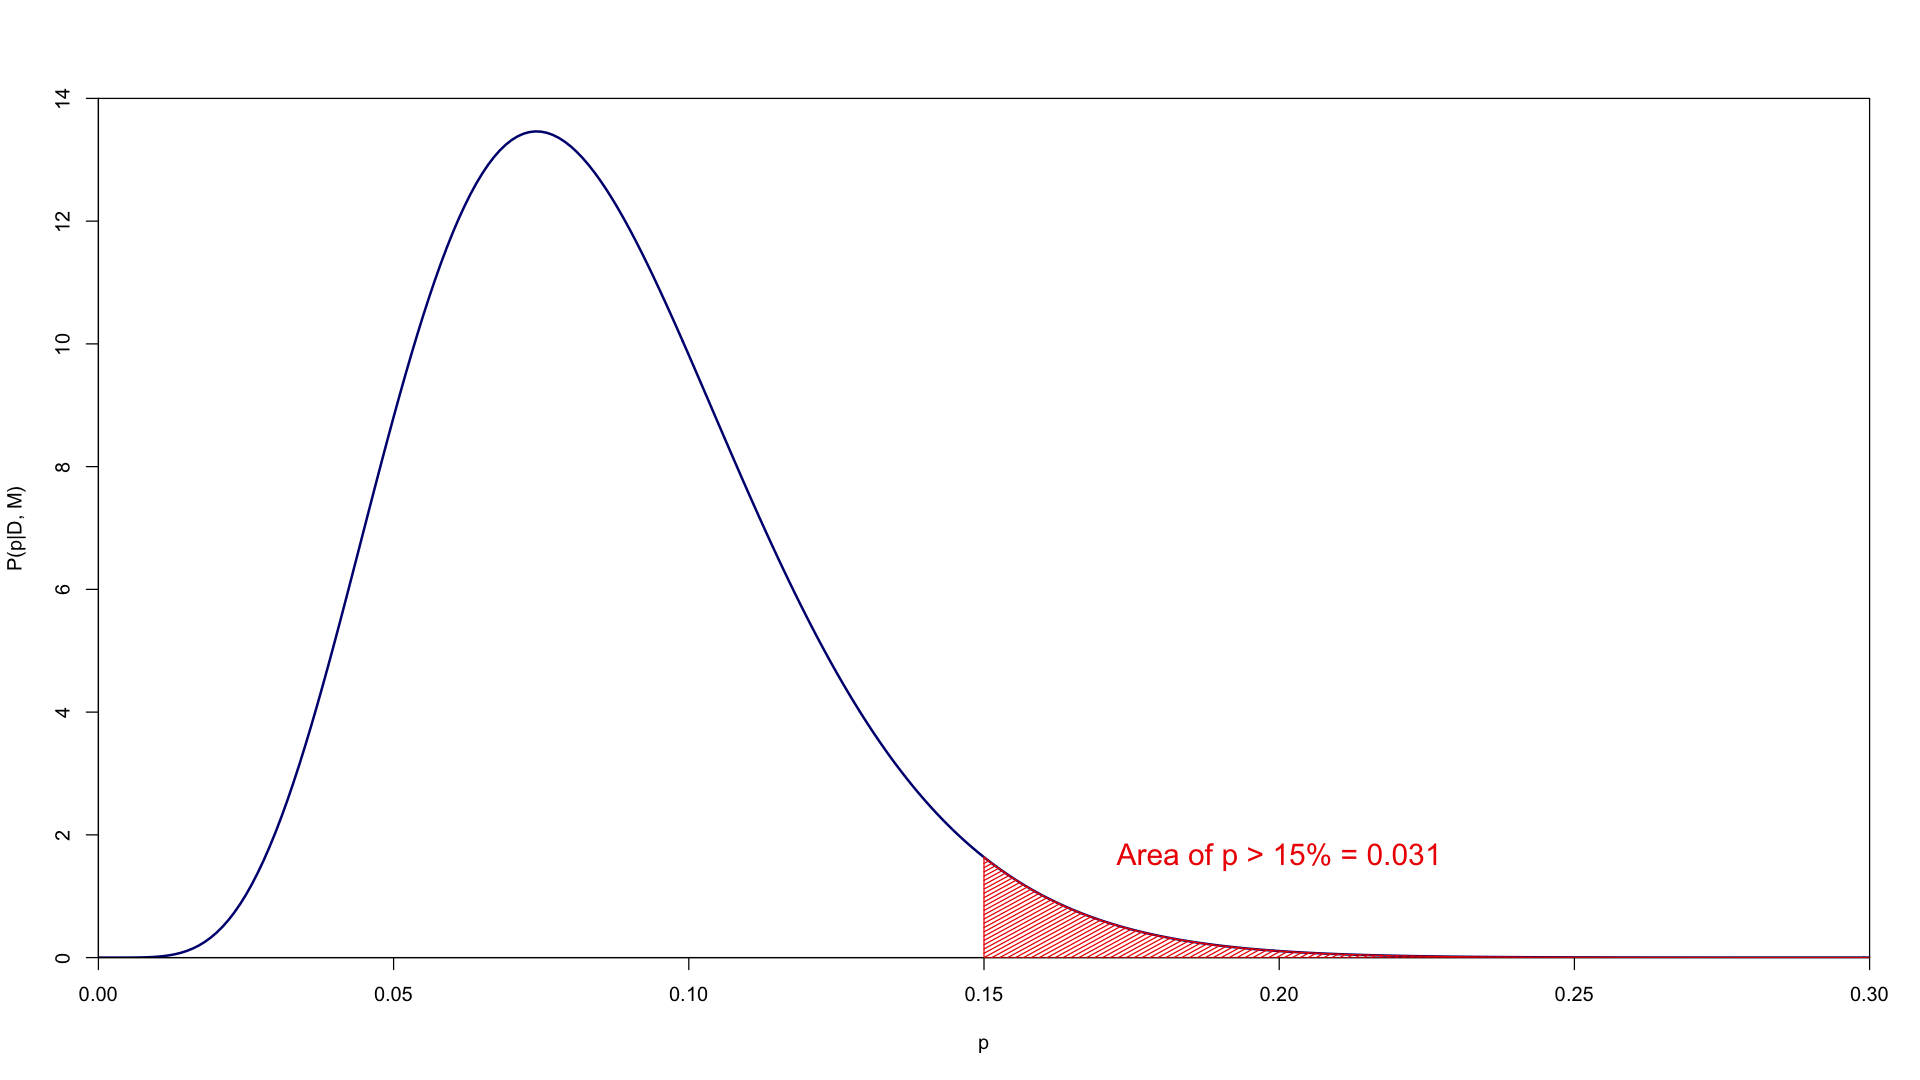

In [8]:
a <- 0.05
p <- seq(0, 1, 0.001)
yy <- beta.post(p)
plot(p, yy, type = 'l', col = "navy", xlim=c(0, 0.3), xaxs='i', yaxs='i', ylim=c(0, 14),
     ylab="P(p|D, M)", xlab="p", lwd = 2)
polygon(c(p[p>=15/100], max(p), 15/100), c(yy[p>=15/100], 0, 0), col = 'red2', density = 55)
area <- pbeta(0.15, alpha+y, beta+n-y, lower.tail=FALSE)
text(0.2, 2, labels = paste0("Area of p > 15% = ", round(area, 3)),  
     pos = 1, cex = 1.5, col="red2", xpd=TRUE)
if (area < a) {
cat("The area is less than the", a, "so I reject the null hypothesis at the", paste0(a*100, "%"), "level of significance:
the UniPD method is better than the established one.")
    } else {
    cat("The area is larger than", a, "so I accept the null hypothesis at the", paste0(a*100, "%"), "level of significance:
the UniPD method is no better than the established one.")
}

## Frequentist approach

The area of the critical region is: 0.05434822
I reject the NULL hypothesis at the 5.43% level of significance, 
since the observed value is inside the critical region.

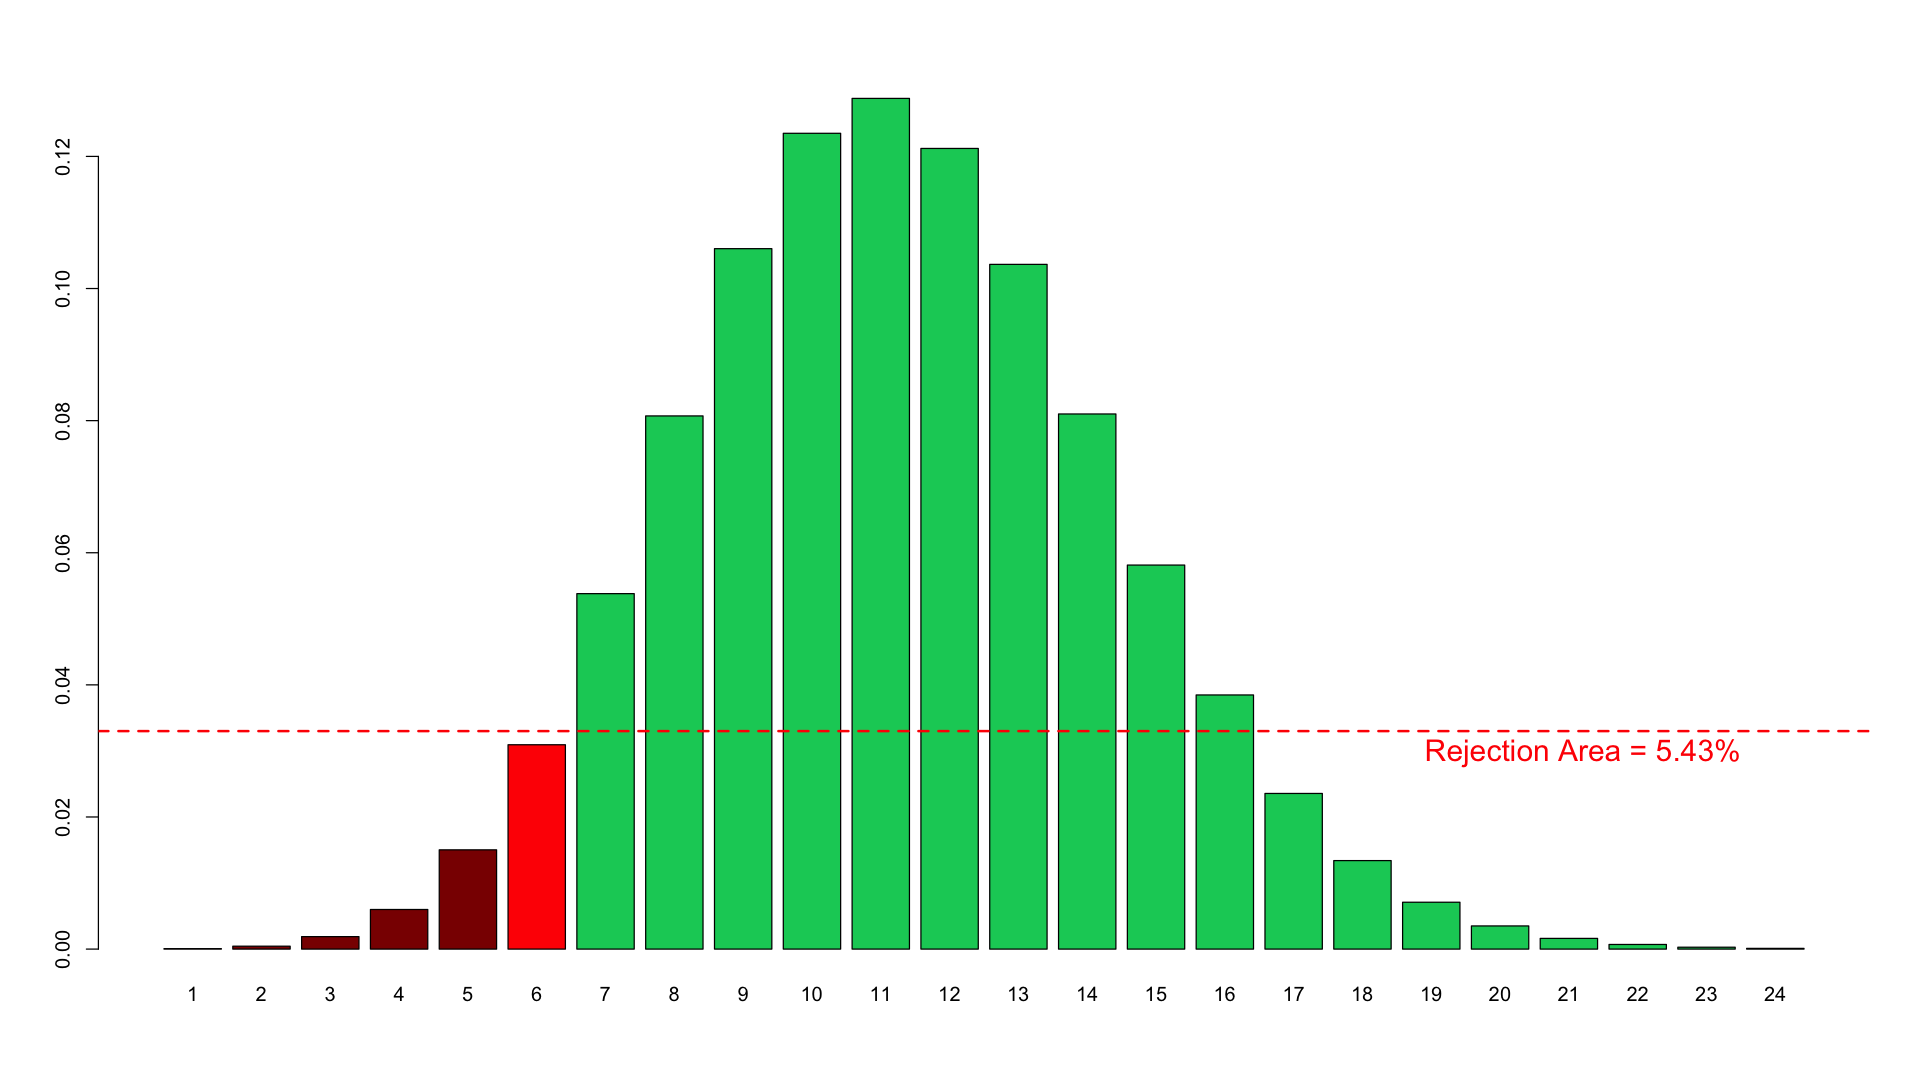

In [9]:
binom_test_mine(n=75, p=15/100, alpha=0.033, yy=6, n.tails=1, 1, 24)

Notice that in this case I would have not rejected the NULL hypothesis if I had use the p-value: in fact, in this case the p-value is equal to 5.43%, that is greater than the 5% level of significance.

# Exercise 2

In [10]:
d1 <- c(rep(0, 109), rep(1, 65), rep(2, 22), rep(3, 3), rep(4, 1))
d2 <- c(rep(0, 144), rep(1, 91), rep(2, 32), rep(3, 11), rep(4, 2))
d <- c(d1, d2)
deaths <- seq(0, 5, length.out=5000)

In [11]:
alpha.u <- sum(d)+1
lambda <- length(d)
post.u <- dgamma(deaths, alpha.u, lambda)

media.u <- alpha.u/lambda
varianza.u <- alpha.u/lambda^2
mediana.u <- median(rgamma(100000, alpha.u, lambda))
cat("Uniform Prior:", "\n\nMean =", media.u, "\nVariance =", varianza.u, "\nMedian = ", mediana.u)

Uniform Prior: 

Mean = 0.6645833 
Variance = 0.001384549 
Median =  0.664027

In [12]:
post.f.u <- function(x) {dgamma(x, alpha.u, lambda)}
conf <- confidence(post.f.u, 0.95, 1)
unif.max <- deaths[which.max(post.u)]
unif.low <- conf[[1]]
unif.high <- conf[[2]]

In [13]:
alpha.j <- sum(d)+1/2
lambda <- length(d)
deaths <- seq(0, 5, length.out=5000)
post.j <- dgamma(deaths, alpha.j, lambda)

media.j <- alpha.j/lambda
varianza.j <- alpha.j/lambda^2
mediana.j <- median(rgamma(100000, alpha.j, lambda))

cat("Jeffrey's Prior:", "\n\nMean =", media.j, "\nVariance =", varianza.j, "\nMedian = ", mediana.j)

Jeffrey's Prior: 

Mean = 0.6635417 
Variance = 0.001382378 
Median =  0.6628392

In [14]:
post.f.j <- function(x) {dgamma(x, alpha.j, lambda)}
conf <- confidence(post.f.j, 0.95, 1)
jeff.max <- deaths[which.max(post.j)]
jeff.low <- conf[[1]]
jeff.high <- conf[[2]]

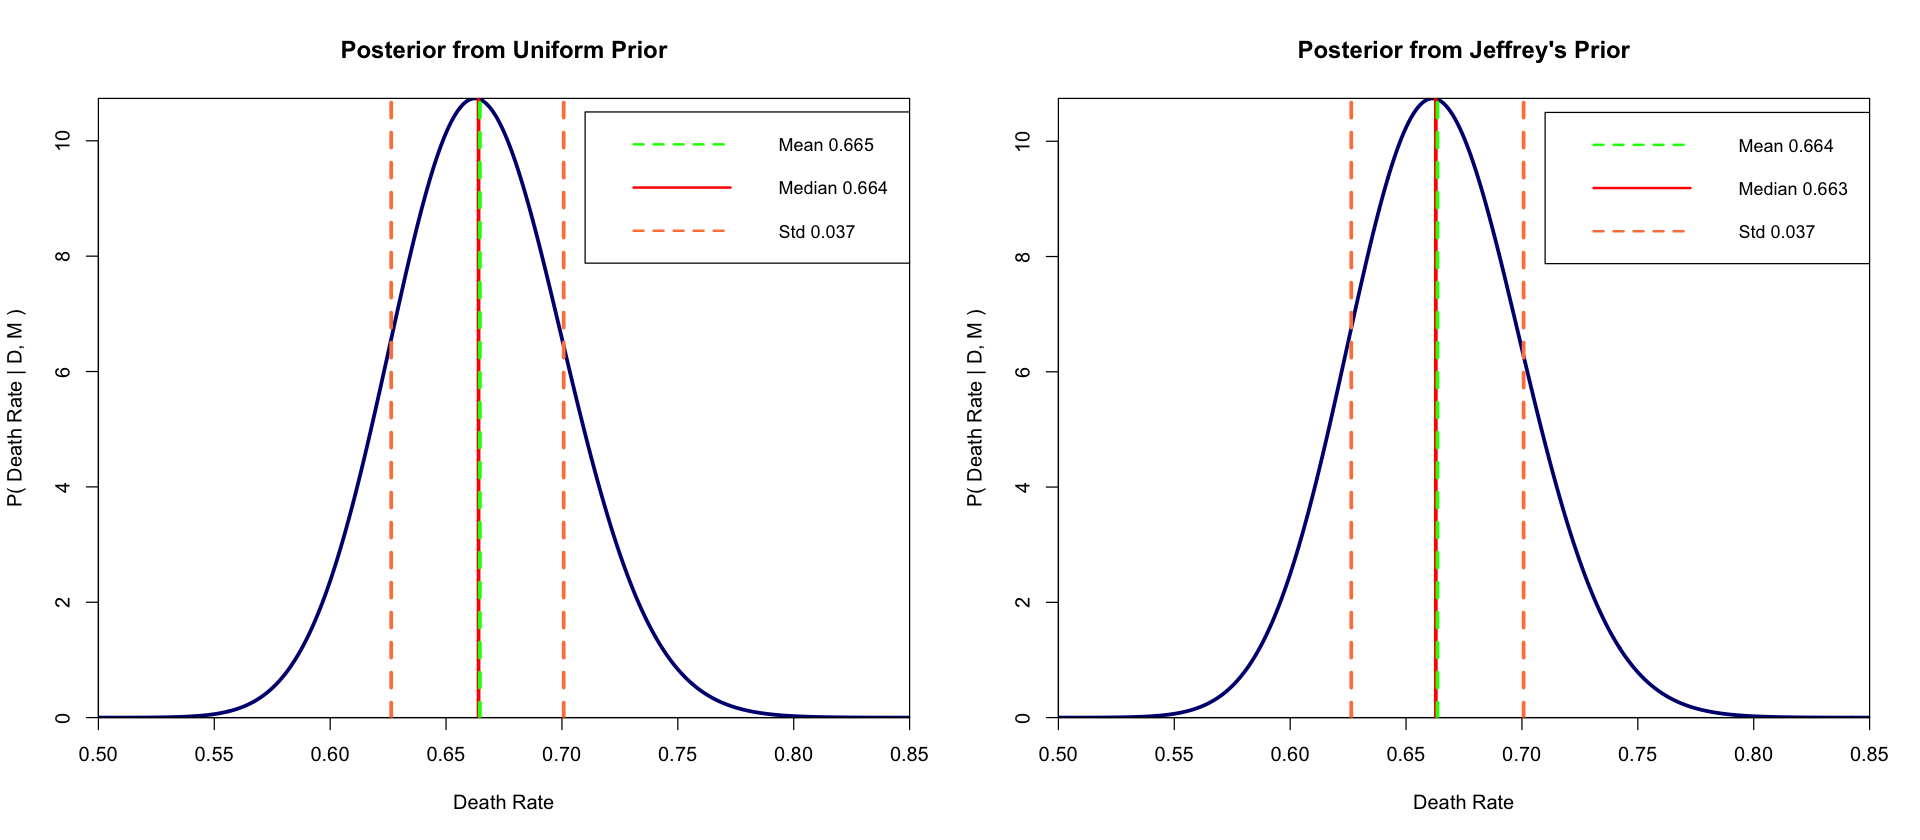

In [15]:
par(mfrow=c(1, 2))
options(repr.plot.width=16, repr.plot.height=7)

#####################################################################################################

post.u <- dgamma(deaths, alpha.u, lambda)
plot(deaths, post.u, type = 'l', xlim = c(0.5, 0.85), col = 'navy', lwd=3, xaxs='i', yaxs='i',
     xlab="Death Rate", ylab="P( Death Rate | D, M )", main = "Posterior from Uniform Prior")
abline(v=mediana.u, col="red", lty=1, lwd=3)
abline(v=media.u, col="green", lty=2, lwd=3)
abline(v=media.j-sqrt(varianza.u), col = "sienna1", lty= 2, lwd=3)
abline(v=media.j+sqrt(varianza.u), col = "sienna1", lty= 2, lwd=3)
legend(0.71, 10.5, legend=c(paste("Mean", round(media.u, 3)), paste("Median", round(mediana.u, 3)), 
                paste("Std", round(sqrt(varianza.u), 3))), box.lty=1, cex = 0.9,
       col=c('green', 'red', "sienna1"),  lty=c(2, 1, 2), lwd=2, y.intersp=2)

#####################################################################################################

post.j <- dgamma(deaths, alpha.j, lambda)
plot(deaths, post.j, type = 'l', xlim = c(0.5, 0.85), col = 'navy', lwd = 3, xaxs='i', yaxs='i',
     xlab="Death Rate", ylab="P( Death Rate | D, M )", main="Posterior from Jeffrey's Prior")
abline(v=mediana.j, col="red", lty=1, lwd = 3)
abline(v=media.j, col="green", lty=2, lwd = 3)
abline(v=media.j-sqrt(varianza.j), col = "sienna1", lty= 2, lwd=3)
abline(v=media.j+sqrt(varianza.j), col = "sienna1", lty= 2, lwd=3)
legend(0.71, 10.5, 
       legend=c(paste("Mean", round(media.j, 3)), paste("Median", round(mediana.j, 3)), 
                paste("Std", round(sqrt(varianza.j), 3))), box.lty=1, cex = 0.9,
       col=c('green', 'red', "sienna1"),  lty=c(2, 1, 2), lwd=2, y.intersp=2)

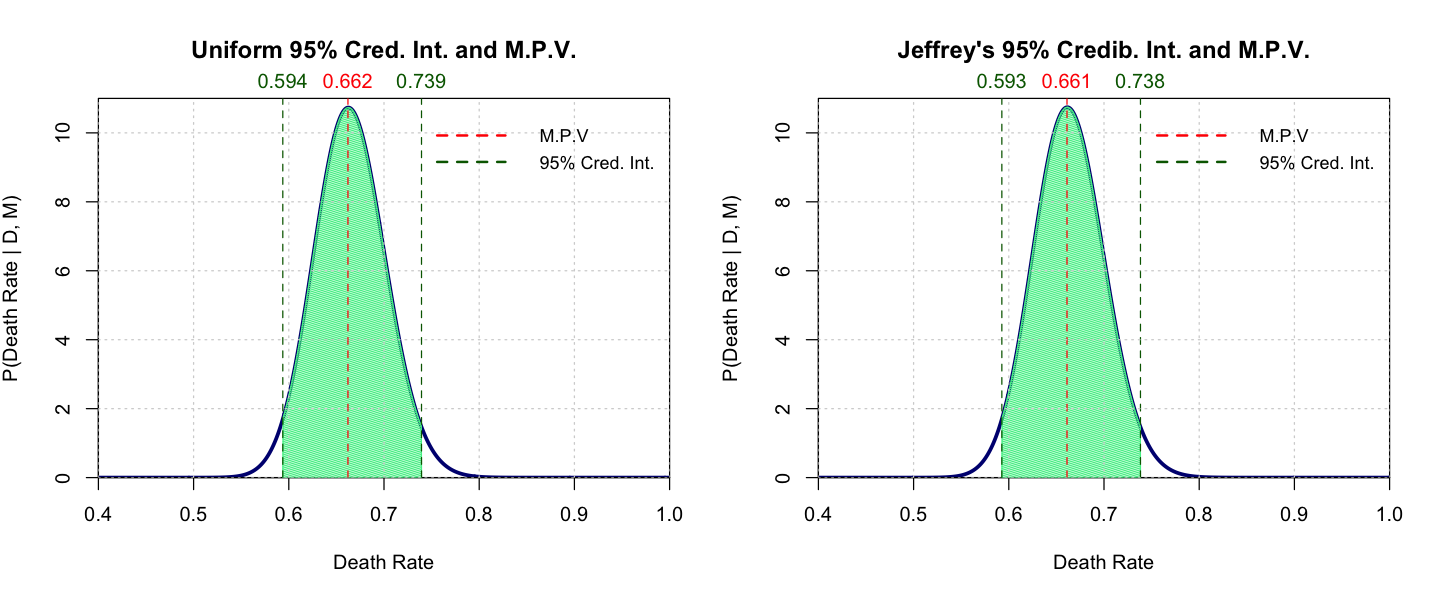

In [16]:
par(mfrow=c(1, 2))
options(repr.plot.width=12, repr.plot.height=5)
###########################################################################################
plot(deaths, post.u, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="Death Rate",
     xlim=c(0.4, 1), ylim=c(0,11),
     ylab=expression(paste("P","(Death Rate | D, M)")),
     main="Uniform 95% Cred. Int. and M.P.V.",
     pch=1)

polygon(c(deaths[deaths>=unif.low & deaths<=unif.high], unif.high, unif.low), 
        c(post.u[deaths>=unif.low & deaths<=unif.high], 0, 0), col = 'seagreen2', density = 55)

abline(v=unif.max, col="red", lty=2, pch=1)
abline(v=unif.low, col="darkgreen", lty=2, pch=1)
abline(v=unif.high, col="darkgreen", lty=2, pch=1)

text(unif.max, par("usr")[4] + 1, labels = round(unif.max, 3), pos = 1, cex = 1, col="red", xpd=TRUE)
text(unif.low, par("usr")[4] + 1, labels = round(unif.low, 3), pos = 1, cex = 1, col="darkgreen", xpd=TRUE)
text(unif.high, par("usr")[4] + 1, labels = round(unif.high, 3), pos = 1, cex = 1, col="darkgreen", xpd=TRUE)
grid()
legend(0.72, 10.5, 
       legend=c("M.P.V", "95% Cred. Int."), box.lty=0, cex = 0.9,
       col=c('red', 'darkgreen'),  lty=c(2, 2), lwd=2, y.intersp=2)
##############################################################################################################
plot(deaths, post.j, 
     xaxs='i', yaxs='i', col='navy', 
     type='l', lty=1, lwd=3, 
     xlab="Death Rate",
     xlim=c(0.4, 1), ylim=c(0,11),
     ylab=expression(paste("P","(Death Rate | D, M)")),
     main="Jeffrey's 95% Credib. Int. and M.P.V.",
     pch=1)

polygon(c(deaths[deaths>=jeff.low & deaths<=jeff.high], jeff.high, jeff.low), 
        c(post.j[deaths>=jeff.low & deaths<=jeff.high], 0, 0), col = 'seagreen2', density = 55)

abline(v=jeff.max, col="red", lty=2, pch=1)
abline(v=jeff.low, col="darkgreen", lty=2, pch=1)
abline(v=jeff.high, col="darkgreen", lty=2, pch=1)

text(jeff.max, par("usr")[4] + 1, labels = round(jeff.max, 3), pos = 1, cex = 1, col="red", xpd=TRUE)
text(jeff.low, par("usr")[4] + 1, labels = round(jeff.low, 3), pos = 1, cex = 1, col="darkgreen", xpd=TRUE)
text(jeff.high, par("usr")[4] + 1, labels = round(jeff.high, 3), pos = 1, cex = 1, col="darkgreen", xpd=TRUE)
grid()
legend(0.72, 10.5, 
       legend=c("M.P.V", "95% Cred. Int."), box.lty=0, cex = 0.9,
       col=c('red', 'darkgreen'),  lty=c(2, 2), lwd=2, y.intersp=2)

# Exercise 3

In [17]:
cat("The freqeuntis estimator for p is: 11/116 =", paste0(round(11/116*100, 2), "%"))
cat("\nI choose the Most Probable Value as Bayesian estimator. It is shown in the plot below.")

The freqeuntis estimator for p is: 11/116 = 9.48%
I choose the Most Probable Value as Bayesian estimator. It is shown in the plot below.

I assume a binomial distribution for the probability that out of $n$ samples, $y$ of them have a high bacter X level. This is because a sample can have a high bacter X level or not, with probability $p$

In [18]:
p <- seq(0, 1, length.out = 1000)
y <- 11
n <- 116
beta.post <- function (x) {
    return(dbeta(x, 1+y, 10+n-y)) #conjugate prior of the binomial
    }

media <- (1+y)/(1+10+n)
varianza <- (1+y)*(10+n-y)/((1+10+n)^2*(1+10+n+1))
std <- sqrt(varianza)
MPV <- p[which.max(beta.post(p))]

conf <- confidence(beta.post, 0.95, 1)
low <- conf[[1]]
high <- conf[[2]]

0.1 is inside the 95% credibility interval, so I accept the null hypothesis at 5% level of significance.

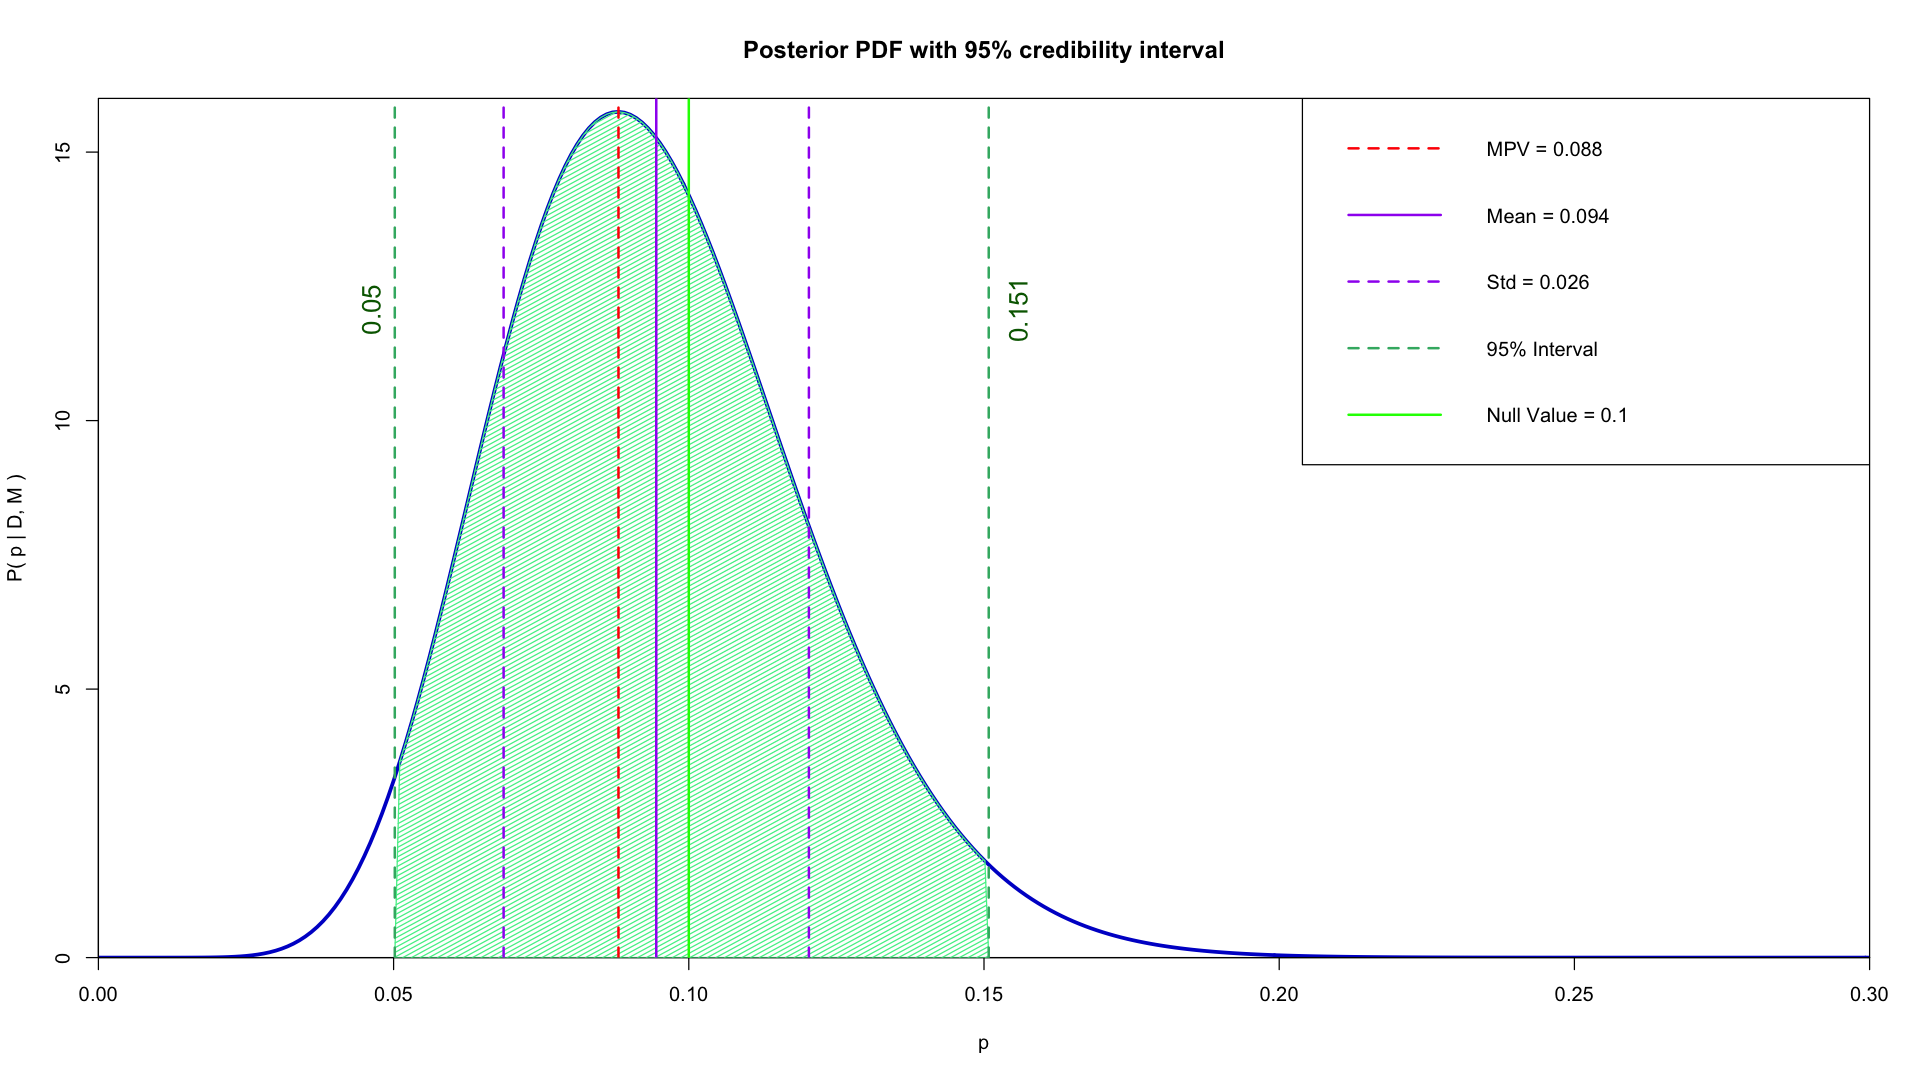

In [19]:
options(repr.plot.width=16, repr.plot.height=9)
plot(p, beta.post(p), type = 'l', xlim = c(0, 0.3), ylim=c(0, 16),
     col = 'blue3', lwd = 3, xaxs='i', yaxs='i',
     xlab="p", ylab="P( p | D, M )", main="Posterior PDF with 95% credibility interval")

polygon(c(p[p>=low & p<=high], high, low), 
        c(beta.post(p)[p>=low & p<=high], 0, 0), col = 'seagreen2', density = 50)

abline(v=media, col="purple", lty=1, lwd = 2)
abline(v=media-std, col = "purple", lty= 2, lwd=2)
abline(v=media+std, col = "purple", lty= 2, lwd=2)
abline(v=MPV, col="red", lty=2, lwd=2)
abline(v=low, col="mediumseagreen", lty=2, lwd = 2)
abline(v=high, col="mediumseagreen", lty=2, lwd = 2)
abline(v=0.1, col="green", lty=1, lwd=2)

text(low-0.005, par("usr")[2]+12, labels = round(low, 3), 
     srt=90, pos = 1, cex = 1.3, col="darkgreen", xpd=TRUE)
text(high+0.004, par("usr")[2]+12, labels = round(high, 3), 
     srt=90, pos = 1, cex = 1.3, col="darkgreen", xpd=TRUE)

legend("topright", legend=c(paste("MPV =", round(MPV, 3)), paste("Mean =", round(media, 3)), 
                            paste("Std =", round(std, 3)), "95% Interval", "Null Value = 0.1"), 
       box.lty=1, cex = 1,
       col=c('red', 'purple', "purple", "mediumseagreen", "green"),  lty=c(2, 1, 2, 2, 1), lwd=2, y.intersp=2)
cat("0.1 is inside the 95% credibility interval, so I accept the null hypothesis at 5% level of significance.")

The area of the critical region is: 0.04247101
I do not reject the NULL hypothesis at the 4.25% level of significance, 
since the observed value is outside the critical region.

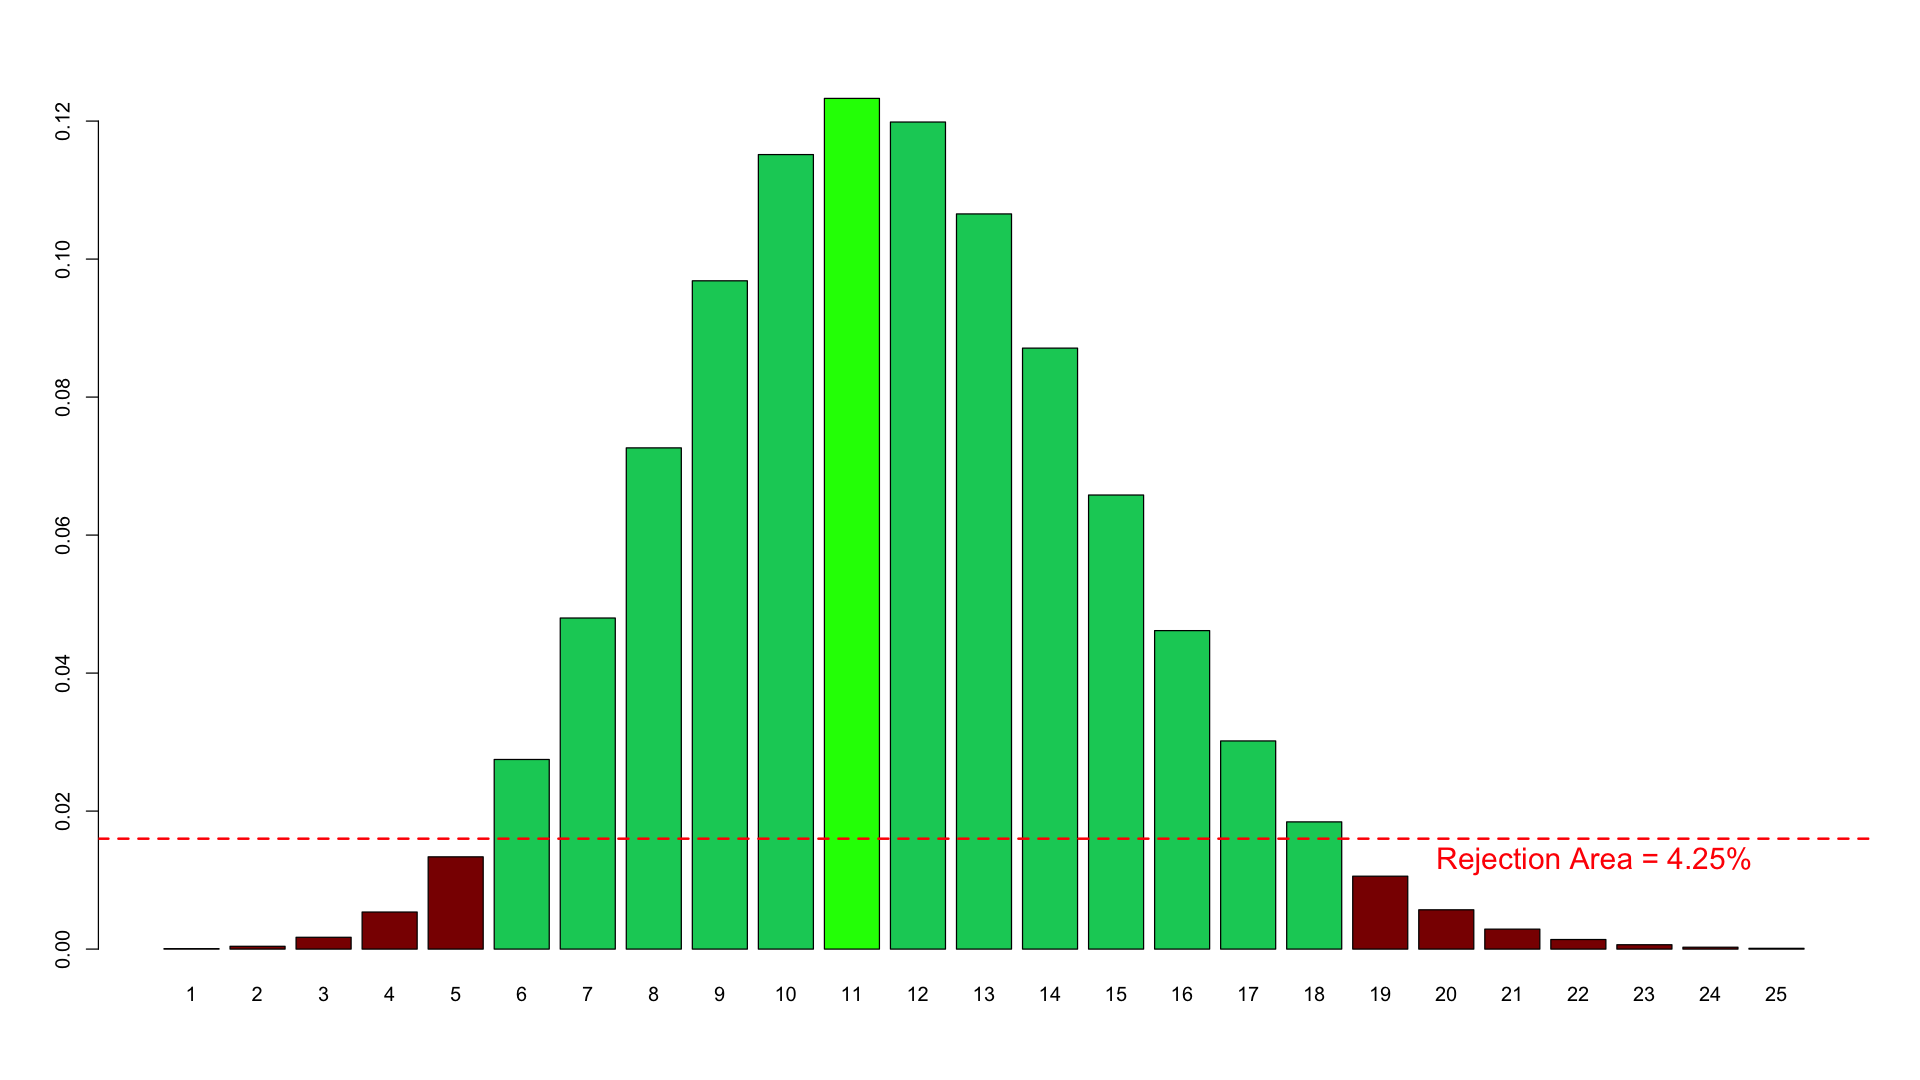

In [20]:
binom_test_mine(n=116, p=0.1, alpha=0.016, yy=11, n.tail=2, 1, 25)

### New measurement

In [21]:
cat("The freqeuntis estimator for p is: 9/165 =", paste0(round(9/165*100, 2), "%"))
cat("\nI choose the Most Probable Values as Bayesian estimators. They are shown in the plots below.")

The freqeuntis estimator for p is: 9/165 = 5.45%
I choose the Most Probable Values as Bayesian estimators. They are shown in the plots below.

In [22]:
p <- seq(0, 1, length.out = 1000)
y <- 9
n <- 165

In [23]:
beta.post.n <- function (x) {
    return(dbeta(x, 1+y, 10+n-y)) #conjugate prior of the binomial
    }

media.n <- (1+y)/(1+10+n)
varianza.n <- (1+y)*(10+n-y)/((1+10+n)^2*(1+10+n+1))
std.n <- sqrt(varianza.n)
MPV.n <- p[which.max(beta.post.n(p))]

conf.n <- confidence(beta.post.n, 0.95, 1)
low.n <- conf.n[[1]]
high.n <- conf.n[[2]]

df <- data.frame(MPV.n, media.n, varianza.n, low.n, high.n)

###########################################################################

beta.post.o <- function (x) {
    return(dbeta(x, 12+y, 10+116-11+n-y)) #conjugate prior of the binomial
    }

media.o <- (12+y)/(12+115+n)
varianza.o <- (12+y)*(115+n-y)/((12+115+n)^2*(12+115+n+1))
std.o <- sqrt(varianza.o)
MPV.o <- p[which.max(beta.post.o(p))]

conf.o <- confidence(beta.post.o, 0.95, 1)
low.o <- conf.o[[1]]
high.o <- conf.o[[2]]

val <- c(MPV.o, media.o, varianza.o, low.o, high.o)
df <- rbind(df, val)

For the case Beta(1, 10), 0.1 is outside the 95% credibility interval, 
so I reject the null hypothesis at 5% level of significance.
For the case Beta(12, 115), 0.1 is inside the 95% credibility interval, 
so I accept the null hypothesis at 5% level of significance.

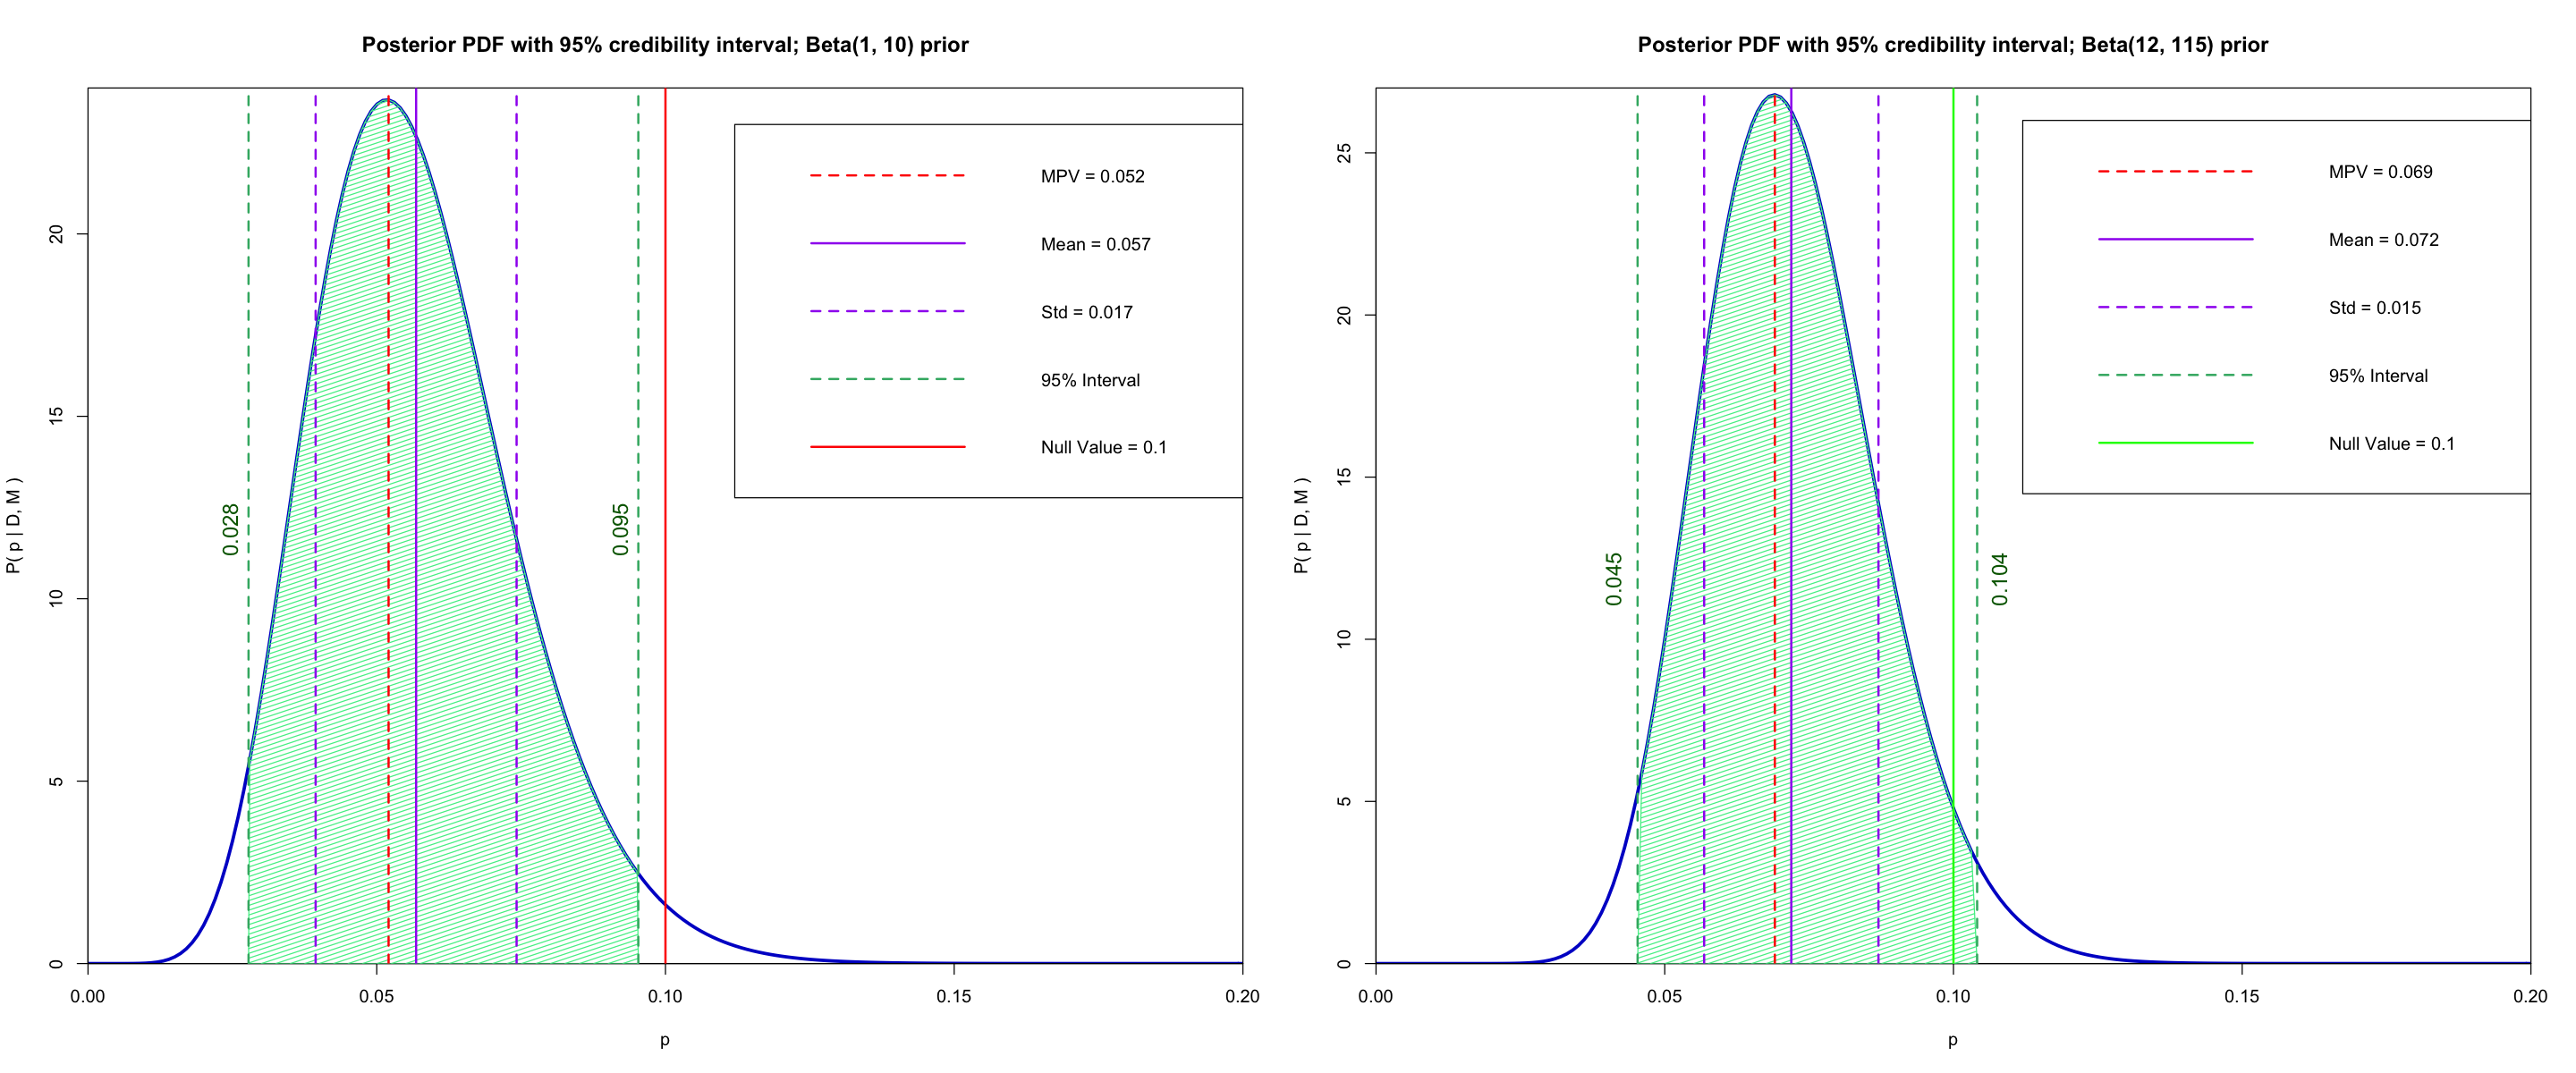

In [24]:
par(mfrow=c(1, 2))
options(repr.plot.width=24, repr.plot.height=10)
###########################################################################################################
plot(p, beta.post.n(p), type = 'l', xlim = c(0, 0.2), ylim=c(0, 24),
     col = 'blue3', lwd = 3, xaxs='i', yaxs='i',
     xlab="p", ylab="P( p | D, M )", main="Posterior PDF with 95% credibility interval; Beta(1, 10) prior")

polygon(c(p[p>=low.n & p<=high.n], high.n, low.n), 
        c(beta.post.n(p)[p>=low.n & p<=high.n], 0, 0), col = 'seagreen2', density = 50)

abline(v=media.n, col="purple", lty=1, lwd = 2)
abline(v=media.n-std.n, col = "purple", lty= 2, lwd=2)
abline(v=media.n+std.n, col = "purple", lty= 2, lwd=2)
abline(v=MPV.n, col="red", lty=2, lwd=2)
abline(v=low.n, col="mediumseagreen", lty=2, lwd = 2)
abline(v=high.n, col="mediumseagreen", lty=2, lwd = 2)
abline(v=0.1, col="red", lty=1, lwd=2)

text(low.n-0.004, par("usr")[2]+12, labels = round(low.n, 3), 
     srt=90, pos = 1, cex = 1.2, col="darkgreen", xpd=TRUE)
text(high.n-0.004, par("usr")[2]+12, labels = round(high.n, 3), 
     srt=90, pos = 1, cex = 1.2, col="darkgreen", xpd=TRUE)

legend(0.112, 23, legend=c(paste("MPV =", round(MPV.n, 3)), paste("Mean =", round(media.n, 3)), 
                            paste("Std =", round(std.n, 3)), "95% Interval", "Null Value = 0.1"), 
       box.lty=1, cex = 1,
       col=c('red', 'purple', "purple", "mediumseagreen", "red"),  lty=c(2, 1, 2, 2, 1), lwd=2, y.intersp=2)
cat("For the case Beta(1, 10), 0.1 is outside the 95% credibility interval, 
so I reject the null hypothesis at 5% level of significance.")
##################################################################################################################
plot(p, beta.post.o(p), type = 'l', xlim = c(0, 0.2), ylim=c(0, 27),
     col = 'blue3', lwd = 3, xaxs='i', yaxs='i',
     xlab="p", ylab="P( p | D, M )", main="Posterior PDF with 95% credibility interval; Beta(12, 115) prior")

polygon(c(p[p>=low.o & p<=high.o], high.o, low.o), 
        c(beta.post.o(p)[p>=low.o & p<=high.o], 0, 0), col = 'seagreen2', density = 50)

abline(v=media.o, col="purple", lty=1, lwd = 2)
abline(v=media.o-std.o, col = "purple", lty= 2, lwd=2)
abline(v=media.o+std.o, col = "purple", lty= 2, lwd=2)
abline(v=MPV.o, col="red", lty=2, lwd=2)
abline(v=low.o, col="mediumseagreen", lty=2, lwd=2)
abline(v=high.o, col="mediumseagreen", lty=2, lwd=2)
abline(v=0.1, col="green", lty=1, lwd=2)

text(low.o-0.005, par("usr")[2]+12, labels = round(low.o, 3), 
     srt=90, pos = 1, cex = 1.2, col="darkgreen", xpd=TRUE)
text(high.o+0.003, par("usr")[2]+12, labels = round(high.o, 3), 
     srt=90, pos = 1, cex = 1.2, col="darkgreen", xpd=TRUE)

legend(0.112, 26, legend=c(paste("MPV =", round(MPV.o, 3)), paste("Mean =", round(media.o, 3)), 
                            paste("Std =", round(std.o, 3)), "95% Interval", "Null Value = 0.1"), 
       box.lty=1, cex = 1,
       col=c('red', 'purple', "purple", "mediumseagreen", "green"),  lty=c(2, 1, 2, 2, 1), lwd=2, y.intersp=2)
cat("\nFor the case Beta(12, 115), 0.1 is inside the 95% credibility interval, 
so I accept the null hypothesis at 5% level of significance.")

The area of the critical region is: 0.05107322
I reject the NULL hypothesis at the 5.11% level of significance, 
since the observed value is inside the critical region.

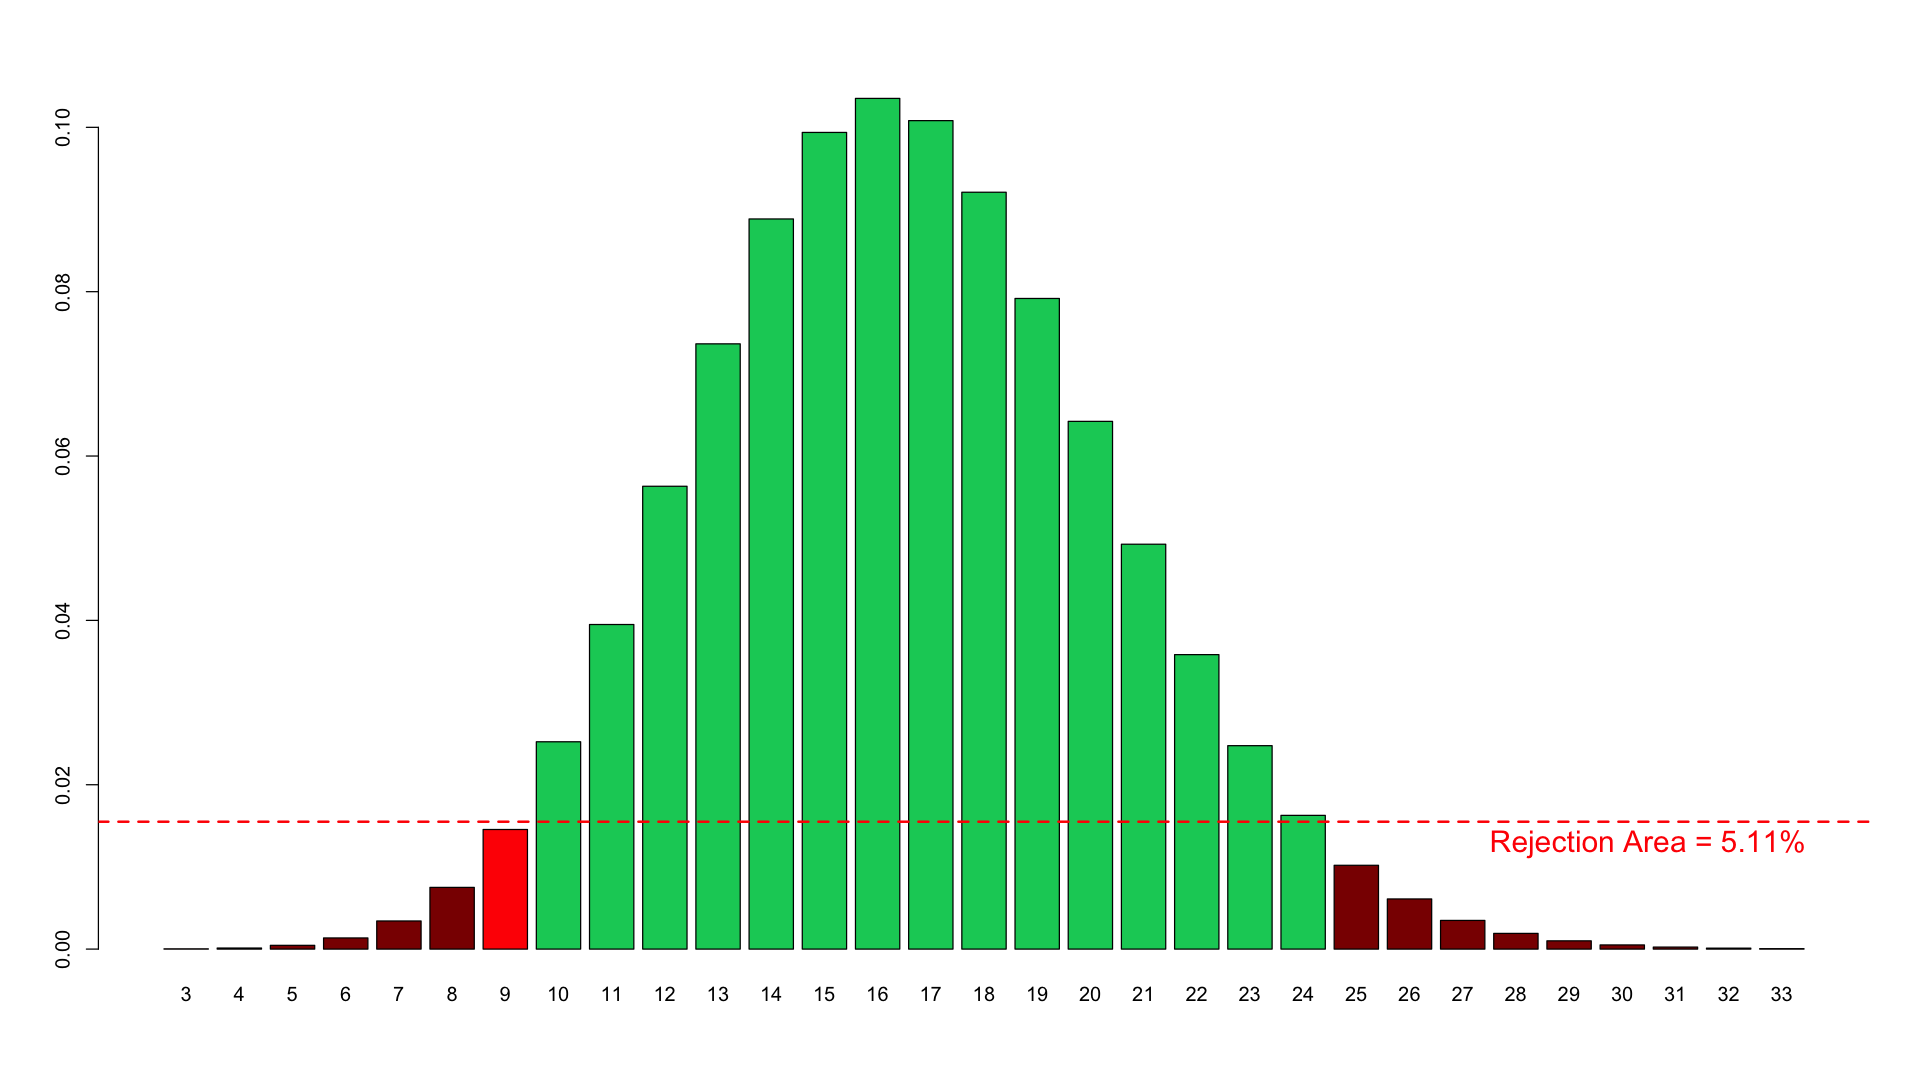

In [25]:
binom_test_mine(n=165, p=0.1, alpha=0.0155, yy=9, n.tail=2, 3, 33)

In [26]:
rownames(df) <- c("Beta(1, 10)", "Beta(12, 115)")
colnames(df) <- c("M.P.V.", "Mean", "Variance", "95% Low", "95% High")
df

,M.P.V.,Mean,Variance,95% Low,95% High
"Beta(1, 10)",0.05205205,0.05681818,0.0003027677,0.0278,0.0953
"Beta(12, 115)",0.06906907,0.07191781,0.0002278008,0.0453,0.1041
